# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis.

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.

## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.

## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
   Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks.

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!


In [1]:
import csv

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
SCRAPE_URL = "https://etherscan.io/txs"
SCRAPE_BLOCKS = 10
TRANSACTIONS_CSV = "transactions.csv"

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

-   **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
-   **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
-   **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

-   [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
-   [Selenium Documentation](https://selenium-python.readthedocs.io/)
-   [Pandas Documentation](https://pandas.pydata.org/docs/)
-   [Ethereum](https://ethereum.org/en/)


In [12]:
def parse_transactions(page_source: str) -> list[dict[str, str]]:
    soup = BeautifulSoup(page_source, "html.parser")
    table = soup.find("table", {"class": "table table-hover table-align-middle mb-0"})
    body = table.find("tbody")
    rows = body.find_all("tr")
    transactions = []
    for row in rows:
        cells = row.find_all("td")
        if len(cells) > 0:
            transaction = {
                "Txn Hash": cells[1].text.strip(),
                "Method": cells[2].text.strip(),
                "Block": cells[3].text.strip(),
                "Timestamp": cells[4].text.strip(),
                "Age": cells[5].text.strip(),
                "From": cells[7].text.strip(),
                "To": cells[9].text.strip(),
                "Value": cells[10].text.strip(),
                "Txn Fee": cells[11].text.strip(),
            }
            transactions.append(transaction)
    return transactions

In [13]:
driver = webdriver.Firefox()
driver.get(SCRAPE_URL)

last_block = None
first_block = None
transactions = []

while True:
    transactions += parse_transactions(driver.page_source)

    if first_block is None:
        last_block = int(transactions[0]["Block"])
        first_block = last_block - SCRAPE_BLOCKS + 1

    if int(transactions[-1]["Block"]) < first_block:
        break

    driver.find_element(By.LINK_TEXT, "Next").click()

driver.close()

In [17]:
print(f"Scraped {len(transactions)} transactions from blocks {first_block} to {last_block}")
print(transactions[0])
print(transactions[-1])

Scraped 4700 transactions from blocks 19334507 to 19334516
{'Txn Hash': '0x87ad207685a04a5630df4dc60f691b3e6679896f1def7d3c5a8af8600be9e1c0', 'Method': 'Sell To Uniswap', 'Block': '19334516', 'Timestamp': '2024-02-29 16:59:47', 'Age': '11 secs ago', 'From': '0xD11c274E...100D7A541', 'To': '0x: Exchange Proxy', 'Value': '0.581130968 ETH', 'Txn Fee': '0.00967144'}
{'Txn Hash': '0xd57fcd1d504476c3d9daad2f5cacb5fb142aba92c9b71a1c54cdcc6f2f14e6f0', 'Method': 'Transfer', 'Block': '19334506', 'Timestamp': '2024-02-29 16:57:47', 'Age': '5 mins ago', 'From': '0x3E56a0C8...15B4f89D0', 'To': 'Tether: USDT Stablecoin', 'Value': '0 ETH', 'Txn Fee': '0.00316241'}


In [26]:
with open(TRANSACTIONS_CSV, "w", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=transactions[0].keys(), lineterminator='\n')
    writer.writeheader()
    writer.writerows(transactions)

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

-   A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
-   A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
-   A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.


In [3]:
df = pd.read_csv(TRANSACTIONS_CSV)
df.head()

,Txn Hash,Method,Block,Timestamp,Age,From,To,Value,Txn Fee
0,0x87ad207685a04a5630df4dc60f691b3e6679896f1def...,Sell To Uniswap,19334516,2024-02-29 16:59:47,11 secs ago,0xD11c274E...100D7A541,0x: Exchange Proxy,0.581130968 ETH,0.009671
1,0x3fb7613717d61a3f6bf330c542e061463aa1868aa24a...,Transfer,19334516,2024-02-29 16:59:47,11 secs ago,0x9c95822B...53D8C79a3,VAIOT: VAI Token,0 ETH,0.002132
2,0x341367774a838fee5d7c7465b9eb151ddbe012dce6de...,Sell To Uniswap,19334516,2024-02-29 16:59:47,11 secs ago,0x3b454995...7500236a3,0x: Exchange Proxy,0.016822346 ETH,0.008656
3,0x9317998e91e7ad56cf0bab4927a425a56ec493243c03...,Transfer,19334516,2024-02-29 16:59:47,11 secs ago,0x37A653a8...8B8b0CFCC,0x57A54b0A...94f9DD578,0.003698047 ETH,0.001506
4,0x87c23770735932244ced56868f2387123505922c42b4...,Execute,19334516,2024-02-29 16:59:47,11 secs ago,0x73491B6d...1CdD889C9,Uniswap: Universal Router,0.08 ETH,0.011457


In [4]:
# Calculate the first and last block numbers as we may use the csv instead of scraping
last_block = int(df["Block"].iloc[0])
first_block = last_block - SCRAPE_BLOCKS + 1

In [5]:
df = df[df["Block"].between(first_block, last_block)]

# Remove duplicate transactions as we may have scraped the same transaction multiple times due to pagination
df = df.drop_duplicates(subset=["Txn Hash"], keep="first", ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Txn Hash   1883 non-null   object 
 1   Method     1883 non-null   object 
 2   Block      1883 non-null   int64  
 3   Timestamp  1883 non-null   object 
 4   Age        1883 non-null   object 
 5   From       1883 non-null   object 
 6   To         1883 non-null   object 
 7   Value      1883 non-null   object 
 8   Txn Fee    1883 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 132.5+ KB


In [6]:
df[~df["Value"].str.contains("ETH")].head()

,Txn Hash,Method,Block,Timestamp,Age,From,To,Value,Txn Fee
834,0x7bd7632e58f8c5abbad7cc8f5138b5e17da30370fc9f...,0x020965d0,19334512,2024-02-29 16:58:59,2 mins ago,0xD267fdA7...284b72dA9,Seawise: Resolver,77 wei,0.027082


In [7]:
# Some values are in wei, kwei, mwei, gwei, etc. We need to convert them to ETH
def convert_values_to_eth(df: pd.DataFrame, unit: str, decimals: int):
    df.loc[df["Value"].str.contains("wei"), "Value"] = df[df["Value"].str.contains(unit)].apply(lambda x: str(int(x["Value"].replace(f" {unit}", "")) / 10**decimals) + " ETH", axis=1)

convert_values_to_eth(df, "wei", 18)
convert_values_to_eth(df, "kwei", 15)
convert_values_to_eth(df, "mwei", 12)
convert_values_to_eth(df, "gwei", 9)

In [8]:
# The values have an 'ETH' suffix. We need to remove the ETH suffix and convert the object dtype into float64
def convert_values_to_float(value):
    return float(value.replace("ETH", ""))
df["Value"] = df["Value"].apply(convert_values_to_float)
df.head()

,Txn Hash,Method,Block,Timestamp,Age,From,To,Value,Txn Fee
0,0x87ad207685a04a5630df4dc60f691b3e6679896f1def...,Sell To Uniswap,19334516,2024-02-29 16:59:47,11 secs ago,0xD11c274E...100D7A541,0x: Exchange Proxy,0.581131,0.009671
1,0x3fb7613717d61a3f6bf330c542e061463aa1868aa24a...,Transfer,19334516,2024-02-29 16:59:47,11 secs ago,0x9c95822B...53D8C79a3,VAIOT: VAI Token,0.000000,0.002132
2,0x341367774a838fee5d7c7465b9eb151ddbe012dce6de...,Sell To Uniswap,19334516,2024-02-29 16:59:47,11 secs ago,0x3b454995...7500236a3,0x: Exchange Proxy,0.016822,0.008656
3,0x9317998e91e7ad56cf0bab4927a425a56ec493243c03...,Transfer,19334516,2024-02-29 16:59:47,11 secs ago,0x37A653a8...8B8b0CFCC,0x57A54b0A...94f9DD578,0.003698,0.001506
4,0x87c23770735932244ced56868f2387123505922c42b4...,Execute,19334516,2024-02-29 16:59:47,11 secs ago,0x73491B6d...1CdD889C9,Uniswap: Universal Router,0.080000,0.011457


In [9]:
# # As we can see, there is no missing value in this dataframe.
# any_missing_values = df.isnull().any().any()
# print(f"There is some missing values in this dataframe: {any_missing_values}")

There is some missing values in this dataframe: False


In [10]:
# def remove_columns(df, columns_to_remove):
#     return df.drop(columns=columns_to_remove)

# columns_to_remove = ["Age"]
# df = remove_columns(df, columns_to_remove)

In [11]:
def plot_distributions(df, srs_df, column, x_label):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=10, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title("Population Distribution")
    plt.xlabel(x_label)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(srs_df[column], bins=10, color="salmon", edgecolor="black", alpha=0.7)
    plt.title("Sample Distribution")
    plt.xlabel(x_label)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

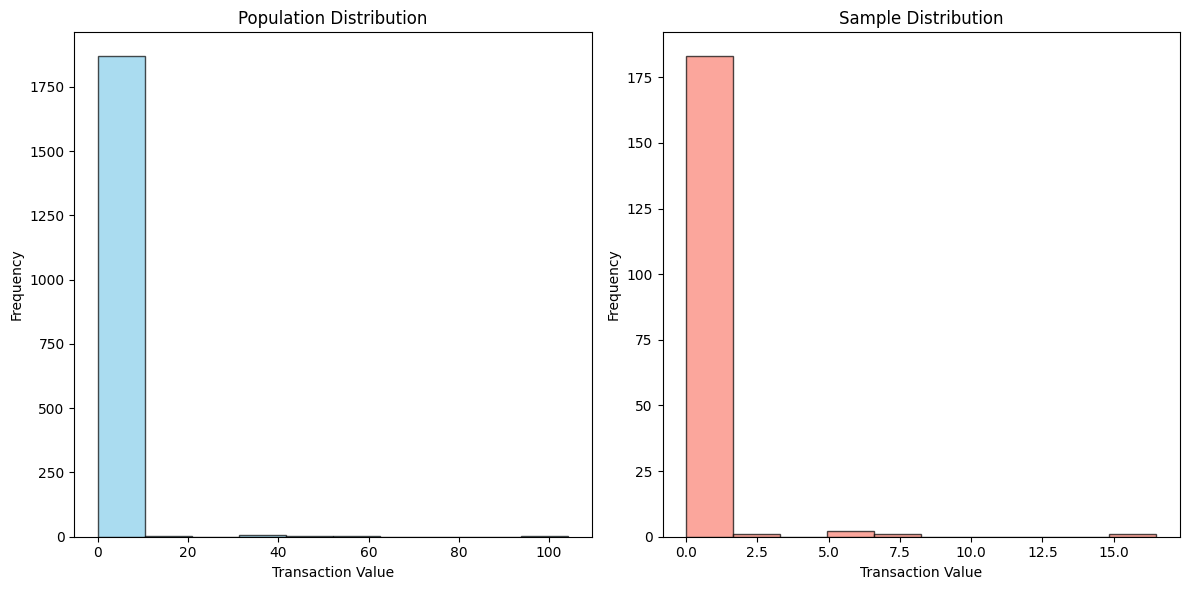

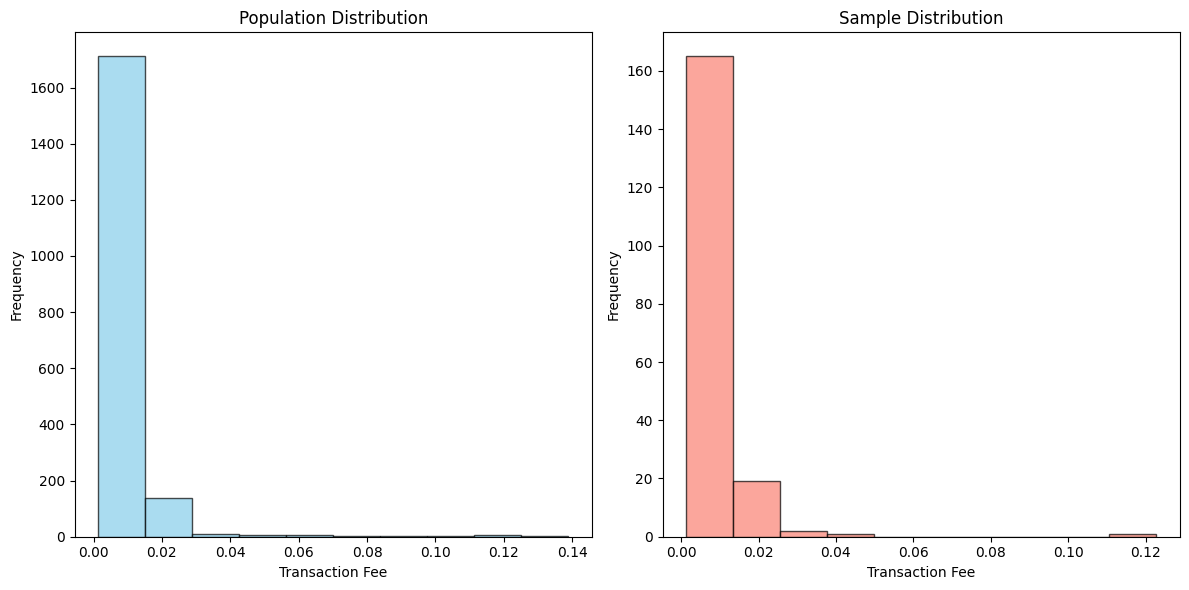

In [18]:
def simple_random_sampling(df, sample_percentage):
    sample_size = int(len(df) * (sample_percentage / 100))
    return df.sample(n=sample_size, random_state=42, replace=False)

srs_df = simple_random_sampling(df, sample_percentage=10)
plot_distributions(df, srs_df, "Value", "Transaction Value")
plot_distributions(df, srs_df, "Txn Fee", "Transaction Fee")

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

-   **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
-   **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.


In [1]:
# Your code here